In [1]:
import tensorflow as tf
print(tf.__version__)
import keras
print(keras.__version__)
# from tensorflow import keras as keras 
from numpy.random import seed
seed(123)
from tensorflow import set_random_seed
set_random_seed(123)

1.15.0
2.3.1


Using TensorFlow backend.


# Zad
Porównaj wyniki działań różnych optymalizacji


In [2]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape)
X_test.shape

(30162, 41)


(15060, 41)

# SGD

In [4]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history_sgd = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               4200      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [5]:
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy",optimizer=sgd, metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_sgd])


Train on 30162 samples, validate on 15060 samples
Epoch 1/100
30162/30162 [==============================] - 1s 45us/step - loss: 0.5037 - accuracy: 0.7629 - val_loss: 0.3702 - val_accuracy: 0.8309
Epoch 2/100
30162/30162 [==============================] - 1s 43us/step - loss: 0.3468 - accuracy: 0.8370 - val_loss: 0.3417 - val_accuracy: 0.8375
Epoch 3/100
30162/30162 [==============================] - 1s 40us/step - loss: 0.3359 - accuracy: 0.8420 - val_loss: 0.3336 - val_accuracy: 0.8444
Epoch 4/100
30162/30162 [==============================] - 1s 41us/step - loss: 0.3317 - accuracy: 0.8447 - val_loss: 0.3333 - val_accuracy: 0.8436
Epoch 5/100
30162/30162 [==============================] - 1s 42us/step - loss: 0.3296 - accuracy: 0.8442 - val_loss: 0.3286 - val_accuracy: 0.8462
Epoch 6/100
30162/30162 [==============================] - 1s 42us/step - loss: 0.3283 - accuracy: 0.8463 - val_loss: 0.3282 - val_accuracy: 0.8475
Epoch 7/100
30162/30162 [==============================] - 1s

In [7]:
history_sgd.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

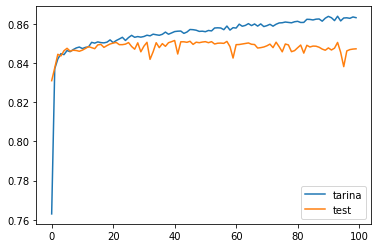

In [8]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['accuracy'], label = "tarina")
plt.plot(history_sgd.history['val_accuracy'], label = "test")
plt.legend()
plt.show()

In [9]:
from keras.callbacks import LearningRateScheduler
# learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.01
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lrate

history_lr_1 = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy",optimizer=sgd, metrics=["accuracy"])

lrate = LearningRateScheduler(step_decay)
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[lrate, history_lr_1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               4200      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Train on 30162 samples, validate on 15060 samples
Epoch 1/100
30162/30162 [==============================] - 1s 45us/step - loss: 0.5084 - accuracy: 0.7590 - val_loss: 0.3720 - val_accuracy: 0.8299
Epoch 2/100
30162/30162 [===========================

Epoch 50/100
30162/30162 [==============================] - 1s 41us/step - loss: 0.3131 - accuracy: 0.8534 - val_loss: 0.3191 - val_accuracy: 0.8506
Epoch 51/100
30162/30162 [==============================] - 1s 41us/step - loss: 0.3130 - accuracy: 0.8525 - val_loss: 0.3191 - val_accuracy: 0.8507
Epoch 52/100
30162/30162 [==============================] - 1s 42us/step - loss: 0.3130 - accuracy: 0.8527 - val_loss: 0.3191 - val_accuracy: 0.8510
Epoch 53/100
30162/30162 [==============================] - 1s 41us/step - loss: 0.3131 - accuracy: 0.8527 - val_loss: 0.3190 - val_accuracy: 0.8504
Epoch 54/100
30162/30162 [==============================] - 1s 42us/step - loss: 0.3129 - accuracy: 0.8527 - val_loss: 0.3190 - val_accuracy: 0.8505
Epoch 55/100
30162/30162 [==============================] - 1s 43us/step - loss: 0.3129 - accuracy: 0.8530 - val_loss: 0.3190 - val_accuracy: 0.8503
Epoch 56/100
30162/30162 [==============================] - 1s 41us/step - loss: 0.3129 - accuracy: 0.8532

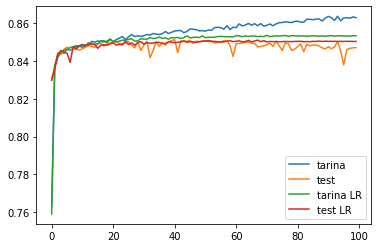

In [10]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['accuracy'], label = "tarina")
plt.plot(history_sgd.history['val_accuracy'], label = "test")

plt.plot(history_lr_1.history['accuracy'], label = "tarina LR")
plt.plot(history_lr_1.history['val_accuracy'], label = "test LR")
plt.legend()
plt.show()

# Adam

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History


history_Adam_1 = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="binary_crossentropy",optimizer=Adam, metrics=["accuracy"])

model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_Adam_1])


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               4200      
_________________________________________________________________
dense_10 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Train on 30162 samples, validate on 15060 samples
Epoch 1/100
30162/30162 [==============================] - 2s 51us/step - loss: 0.3936 - accuracy: 0.8212 - val_loss: 0.3438 - val_accuracy: 0.8446
Epoch 2/100
30162/30162 [===========================

Epoch 50/100
30162/30162 [==============================] - 1s 45us/step - loss: 0.2767 - accuracy: 0.8696 - val_loss: 0.3380 - val_accuracy: 0.8467
Epoch 51/100
30162/30162 [==============================] - 1s 46us/step - loss: 0.2760 - accuracy: 0.8704 - val_loss: 0.3395 - val_accuracy: 0.8489
Epoch 52/100
30162/30162 [==============================] - 1s 45us/step - loss: 0.2755 - accuracy: 0.8698 - val_loss: 0.3406 - val_accuracy: 0.8461
Epoch 53/100
30162/30162 [==============================] - 1s 44us/step - loss: 0.2745 - accuracy: 0.8697 - val_loss: 0.3424 - val_accuracy: 0.8472
Epoch 54/100
30162/30162 [==============================] - 1s 47us/step - loss: 0.2738 - accuracy: 0.8713 - val_loss: 0.3412 - val_accuracy: 0.8440
Epoch 55/100
30162/30162 [==============================] - 1s 46us/step - loss: 0.2729 - accuracy: 0.8718 - val_loss: 0.3474 - val_accuracy: 0.8481
Epoch 56/100
30162/30162 [==============================] - 1s 46us/step - loss: 0.2719 - accuracy: 0.8720

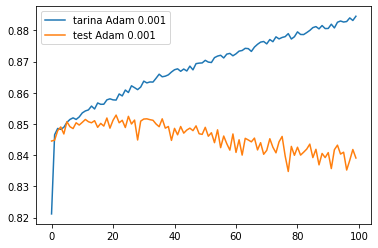

In [12]:
plt.plot(history_Adam_1.history['accuracy'], label = "tarina Adam 0.001")
plt.plot(history_Adam_1.history['val_accuracy'], label = "test Adam 0.001")
plt.legend()
plt.show()

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History

# learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lrate


history_Adam_2 = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="binary_crossentropy",optimizer=Adam, metrics=["accuracy"])

lrate = LearningRateScheduler(step_decay)
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[lrate, history_Adam_2])


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 100)               4200      
_________________________________________________________________
dense_14 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Train on 30162 samples, validate on 15060 samples
Epoch 1/100
30162/30162 [==============================] - 3s 114us/step - loss: 0.3785 - accuracy: 0.8214 - val_loss: 0.3431 - val_accuracy: 0.8448
Epoch 2/100
30162/30162 [==========================

Epoch 50/100
30162/30162 [==============================] - 1s 49us/step - loss: 0.3028 - accuracy: 0.8579 - val_loss: 0.3181 - val_accuracy: 0.8502
Epoch 51/100
30162/30162 [==============================] - 2s 62us/step - loss: 0.3027 - accuracy: 0.8573 - val_loss: 0.3182 - val_accuracy: 0.8503
Epoch 52/100
30162/30162 [==============================] - 2s 56us/step - loss: 0.3027 - accuracy: 0.8571 - val_loss: 0.3180 - val_accuracy: 0.8507
Epoch 53/100
30162/30162 [==============================] - 1s 47us/step - loss: 0.3026 - accuracy: 0.8574 - val_loss: 0.3181 - val_accuracy: 0.8507
Epoch 54/100
30162/30162 [==============================] - 1s 46us/step - loss: 0.3026 - accuracy: 0.8575 - val_loss: 0.3181 - val_accuracy: 0.8507
Epoch 55/100
30162/30162 [==============================] - 1s 46us/step - loss: 0.3026 - accuracy: 0.8575 - val_loss: 0.3180 - val_accuracy: 0.8503
Epoch 56/100
30162/30162 [==============================] - 1s 47us/step - loss: 0.3025 - accuracy: 0.8575

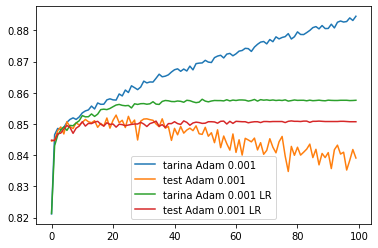

In [14]:
plt.plot(history_Adam_1.history['accuracy'], label = "tarina Adam 0.001")
plt.plot(history_Adam_1.history['val_accuracy'], label = "test Adam 0.001")

plt.plot(history_Adam_2.history['accuracy'], label = "tarina Adam 0.001 LR")
plt.plot(history_Adam_2.history['val_accuracy'], label = "test Adam 0.001 LR")
plt.legend()
plt.show()

In [15]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history_Adam_3 = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Adam = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="binary_crossentropy",optimizer=Adam, metrics=["accuracy"])

lrate = LearningRateScheduler(step_decay)
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_Adam_3])


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 100)               4200      
_________________________________________________________________
dense_18 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Train on 30162 samples, validate on 15060 samples
Epoch 1/100
30162/30162 [==============================] - 2s 52us/step - loss: 0.6477 - accuracy: 0.6347 - val_loss: 0.5478 - val_accuracy: 0.7543
Epoch 2/100
30162/30162 [===========================

Epoch 50/100
30162/30162 [==============================] - 1s 46us/step - loss: 0.3184 - accuracy: 0.8515 - val_loss: 0.3247 - val_accuracy: 0.8501
Epoch 51/100
30162/30162 [==============================] - 1s 47us/step - loss: 0.3182 - accuracy: 0.8518 - val_loss: 0.3232 - val_accuracy: 0.8491
Epoch 52/100
30162/30162 [==============================] - 1s 47us/step - loss: 0.3180 - accuracy: 0.8510 - val_loss: 0.3233 - val_accuracy: 0.8491
Epoch 53/100
30162/30162 [==============================] - 1s 49us/step - loss: 0.3177 - accuracy: 0.8523 - val_loss: 0.3228 - val_accuracy: 0.8495
Epoch 54/100
30162/30162 [==============================] - 1s 48us/step - loss: 0.3174 - accuracy: 0.8524 - val_loss: 0.3229 - val_accuracy: 0.8499
Epoch 55/100
30162/30162 [==============================] - 1s 47us/step - loss: 0.3171 - accuracy: 0.8518 - val_loss: 0.3224 - val_accuracy: 0.8494
Epoch 56/100
30162/30162 [==============================] - 1s 46us/step - loss: 0.3169 - accuracy: 0.8528

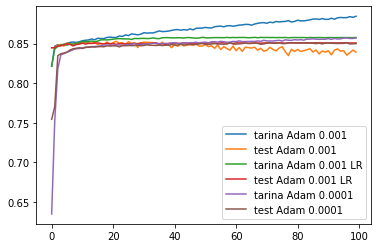

In [16]:
plt.plot(history_Adam_1.history['accuracy'], label = "tarina Adam 0.001")
plt.plot(history_Adam_1.history['val_accuracy'], label = "test Adam 0.001")

plt.plot(history_Adam_2.history['accuracy'], label = "tarina Adam 0.001 LR")
plt.plot(history_Adam_2.history['val_accuracy'], label = "test Adam 0.001 LR")

plt.plot(history_Adam_3.history['accuracy'], label = "tarina Adam 0.0001")
plt.plot(history_Adam_3.history['val_accuracy'], label = "test Adam 0.0001")

plt.legend()
plt.show()

In [17]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

# learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.0001
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lrate


history_Adam_4 = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Adam = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="binary_crossentropy",optimizer=Adam, metrics=["accuracy"])

lrate = LearningRateScheduler(step_decay)
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[lrate, history_Adam_4])


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 100)               4200      
_________________________________________________________________
dense_22 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Train on 30162 samples, validate on 15060 samples
Epoch 1/100
30162/30162 [==============================] - 2s 71us/step - loss: 0.5928 - accuracy: 0.6934 - val_loss: 0.5283 - val_accuracy: 0.7543
Epoch 2/100
30162/30162 [===========================

Epoch 50/100
30162/30162 [==============================] - 1s 48us/step - loss: 0.3273 - accuracy: 0.8485 - val_loss: 0.3310 - val_accuracy: 0.8466
Epoch 51/100
30162/30162 [==============================] - 1s 49us/step - loss: 0.3272 - accuracy: 0.8487 - val_loss: 0.3310 - val_accuracy: 0.8464
Epoch 52/100
30162/30162 [==============================] - 1s 48us/step - loss: 0.3272 - accuracy: 0.8489 - val_loss: 0.3309 - val_accuracy: 0.8466
Epoch 53/100
30162/30162 [==============================] - 1s 49us/step - loss: 0.3272 - accuracy: 0.8487 - val_loss: 0.3309 - val_accuracy: 0.8466
Epoch 54/100
30162/30162 [==============================] - 1s 49us/step - loss: 0.3272 - accuracy: 0.8485 - val_loss: 0.3309 - val_accuracy: 0.8466
Epoch 55/100
30162/30162 [==============================] - 1s 48us/step - loss: 0.3272 - accuracy: 0.8487 - val_loss: 0.3309 - val_accuracy: 0.8465
Epoch 56/100
30162/30162 [==============================] - 1s 48us/step - loss: 0.3271 - accuracy: 0.8487

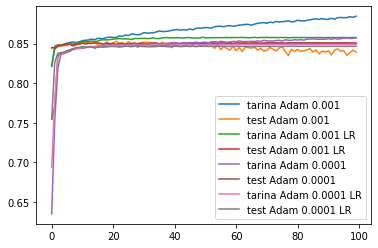

In [18]:
plt.plot(history_Adam_1.history['accuracy'], label = "tarina Adam 0.001")
plt.plot(history_Adam_1.history['val_accuracy'], label = "test Adam 0.001")

plt.plot(history_Adam_2.history['accuracy'], label = "tarina Adam 0.001 LR")
plt.plot(history_Adam_2.history['val_accuracy'], label = "test Adam 0.001 LR")

plt.plot(history_Adam_3.history['accuracy'], label = "tarina Adam 0.0001")
plt.plot(history_Adam_3.history['val_accuracy'], label = "test Adam 0.0001")

plt.plot(history_Adam_4.history['accuracy'], label = "tarina Adam 0.0001 LR")
plt.plot(history_Adam_4.history['val_accuracy'], label = "test Adam 0.0001 LR")


plt.legend()
plt.show()